<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/9_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input data:
[[1 4]
 [2 2]
 [2 5]
 [3 3]
 [3 4]
 [4 7]
 [5 6]
 [6 4]
 [6 7]
 [7 6]
 [7 9]
 [8 7]
 [8 9]
 [9 4]
 [9 8]]
clusters:
[1 1 1 1 1 2 2 2 2 2 0 0 0 2 0]
kmeans.inertia: 36.91666666666667
kmeans.labels: [1 1 1 1 1 2 2 2 2 2 0 0 0 2 0]
kmeans.algorithm: auto
For n_clusters = 3 The average silhouette_score is : 0.4153407670307898
sample_silhouette_values:
 [0.65074033 0.6185424  0.5478873  0.61705197 0.57919343 0.18887114
 0.39498669 0.28747698 0.05572809 0.10496279 0.52273767 0.34845742
 0.64952186 0.07634037 0.58761307]


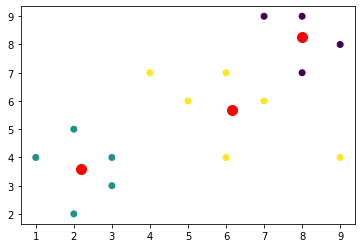

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# import sci-kit learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 입력 data 정의
df = np.array([[1,4],[2,2],[2,5],[3,3],[3,4],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
print ('Input data:')
print (df)

# cluster 개수 정의
n_clusters = 3

# K-mean 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10)

# k-mean cluster결과 
y_pred = kmeans.fit_predict(df)


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
silhouette_avg = silhouette_score(df, y_pred)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, y_pred)

print ('clusters:')
print (y_pred)

print ('kmeans.inertia:',kmeans.inertia_)
print ('kmeans.labels:',kmeans.labels_)
print ('kmeans.algorithm:',kmeans.algorithm)

# select # of cluster
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
print ('sample_silhouette_values:\n', sample_silhouette_values)

# plot
plt.scatter(df[:,0], df[:,1])
plt.savefig('05_kmeans_original.png')
plt.clf()

plt.scatter(df[:,0], df[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.savefig('05_kmeans_centers.png')